In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[2, 4, 2], [2, 1, 3], [3, 1, 2], [4, 2, 2], [1, 3, 2]])

In [3]:
data

array([[2, 4, 2],
       [2, 1, 3],
       [3, 1, 2],
       [4, 2, 2],
       [1, 3, 2]])

In [4]:
normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [5]:
normalized_data

array([[-0.39223227,  1.54348727, -0.5       ],
       [-0.39223227, -1.02899151,  2.        ],
       [ 0.58834841, -1.02899151, -0.5       ],
       [ 1.56892908, -0.17149859, -0.5       ],
       [-1.37281295,  0.68599434, -0.5       ]])

In [6]:
covariance_matrix = np.cov(normalized_data.T)

In [7]:
covariance_matrix

array([[ 1.25      , -0.5045046 , -0.24514517],
       [-0.5045046 ,  1.25      , -0.64311969],
       [-0.24514517, -0.64311969,  1.25      ]])

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [10]:
eigenvalues

array([0.30329161, 1.48664467, 1.96006372])

In [11]:
eigenvectors

array([[ 0.49616865,  0.79895088,  0.33984431],
       [ 0.65306483, -0.08550098, -0.7524599 ],
       [ 0.57212148, -0.59528738,  0.56418963]])

In [12]:
sorted_indices = np.argsort(eigenvalues)[::-1]

In [15]:
sorted_indices

array([2, 1, 0], dtype=int64)

In [16]:
sorted_eigenvalues = eigenvalues[sorted_indices]

In [17]:
sorted_eigenvalues

array([1.96006372, 1.48664467, 0.30329161])

In [18]:
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [19]:
sorted_eigenvectors

array([[ 0.33984431,  0.79895088,  0.49616865],
       [-0.7524599 , -0.08550098,  0.65306483],
       [ 0.56418963, -0.59528738,  0.57212148]])

In [20]:
k = 2
selected_eigenvectors = sorted_eigenvectors[:, :k]

In [21]:
selected_eigenvectors

array([[ 0.33984431,  0.79895088],
       [-0.7524599 , -0.08550098],
       [ 0.56418963, -0.59528738]])

In [22]:
transformed_data = np.dot(normalized_data, selected_eigenvectors)

In [23]:
transformed_data

array([[-1.576805  , -0.1477003 ],
       [ 1.76935621, -1.4159693 ],
       [ 0.69212689,  0.85568495],
       [ 0.38014261,  1.56580426],
       [-1.26482072, -0.85781961]])

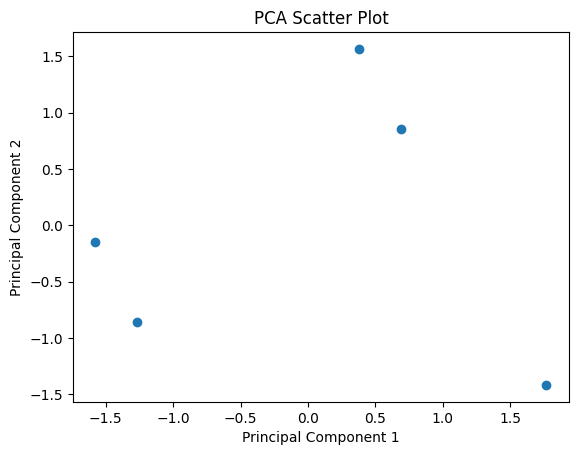

In [24]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()